In [1]:
# Chargement des packages
#pip install wordcloud
#!pip install tweepy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from skimpy import skim  #Pour avoir une description clair des données 

#Woeekcloud permet d'afficher le graphhique des mots, comme les mots les plus fréquents etc ...


# Description des données



La table contient des données textuelles associées à des sentiments exprimés sur les réseaux sociaux. Elle est sera utilisée  pour entraîner et évaluer un modèle de classification de sentiment associé aux tweet.


La table comprend les colonnes suivantes :

1. **target**: Cette colonne représente la polarité du sentiment exprimé dans le texte. Elle peut prendre deux valeurs :
   - Valeur 0 : correspond à un sentiment négatif.
   - Valeur 4 : correspond à un sentiment positif.

2. **ids**: Identifiant unique associé à chaque enregistrement.

3. **date**: La date et l'heure de la publication du texte.

4. **flag**: Un marqueur indiquant la provenance des données. Il peut prendre les valeurs suivantes :
   - "NO_QUERY" : indique que les données ne proviennent pas d'une requête spécifique.
   - Autres valeurs : peuvent indiquer la requête ou l'origine des données.

5. **user**: Le nom d'utilisateur de l'auteur du texte.

6. **text**: Le texte du tweet ou du message exprimant le sentiment.


Cliquez [ici](https://www.kaggle.com/datasets/kazanova/sentiment140) pour accéder à la base de données.


**Remarque:** 
- Si le path ne foctionne pas à cause de problème de permission, vous pouvez télécharger les données en zip sur le site ou bien à partir du github 

In [9]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
#Téléchargement des données

import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

100%|██████████| 80.9M/80.9M [00:10<00:00, 8.22MB/s]

Extracting files...


Path to dataset files: C:\Users\khodj\.cache\kagglehub\datasets\kazanova\sentiment140\versions\2


In [2]:
# Importation de la base de données

#Les colonnes sont à modifier selon votre dataset 
columns = ['target','ids','date','flag','user','text']

df=pd.read_csv("Tweets.csv", encoding='ISO-8859-1',names=columns)

In [3]:
# Informations sur la base de données
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1600000 │ │ string      │ 4     │                                                         │
│ │ Number of columns │ 6       │ │ int32       │ 2     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ target   │  0 │    0 │        2 │        2 │        0 │        0 │        2 │        4 │        4 │ ▇    ▇ │  │
│ │ ids      │  0 │    0 │ 83670000 │ 17760000 │ -2126000 │ -1995000 │ 18820000 │ 19990000 │ 20730000 │ ▃    ▇ │  │
│ │          │    │      │        0 │       00 │      000 │      000 │       00 │       00 │       00 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ date                      │       0 │          0 │                            6 │                  9600000 │  │
│ │ flag                      │       0 │          0 │                            1 │                  1600000 │  │
│ │ user                      │       0 │          0 │                            1 │                  1600000 │  │
│ │ text                      │       0 │          0 │                           14 │                 23011409 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [4]:
#La somme des valleurs manquantes (Vérification!)
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [5]:
#On se concentre sur les deus variables target et text 
df = df[['target','text']]

In [6]:
#Vérifier les valeurs unique 
df.target.unique()

array([0, 4], dtype=int64)

In [7]:
# Remplacer le 4 par le 1
df.loc[df['target'] == 4, 'target'] = 1
df.target.unique()

array([0, 1], dtype=int64)

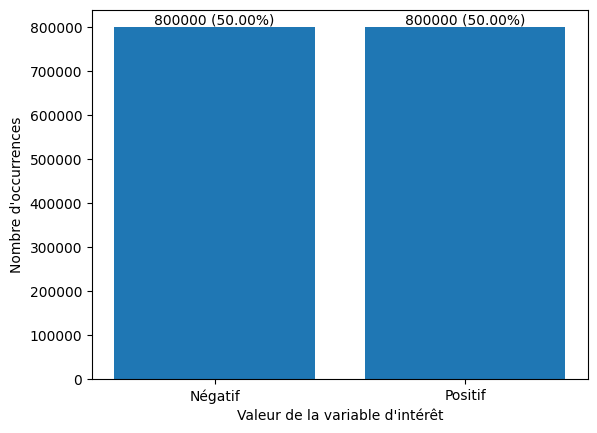

In [8]:
# On va étudier ici la répartition entre les classes de tweets 

target_counts = df['target'].value_counts()

# Calculer la proportion pour chaque valeur de la variable d'intérêt (target)
target_proportions = df['target'].value_counts(normalize=True)

# Créer un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajouter les étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiqueter l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajouter une légende aux barres
plt.xticks(target_counts.index, ['Négatif', 'Positif'])

# Afficher le graphique
plt.show()

- **On a 16 millions de tweets au total, donc on va choisir, au hasard, 10000 tweets de chaque classes afin de réduire lle temps d'entrainement**

In [9]:
# Sélectionner aléatoirement 10 000 tweets positifs
tweets_positifs = df[df['target'] == 1].sample(n=10000, random_state=42)

# Sélectionner aléatoirement 10 000 tweets négatifs
tweets_negatifs = df[df['target'] == 0].sample(n=10000, random_state=42)

# Concaténer les tweets positifs et négatifs sélectionnés
df_select = pd.concat([tweets_positifs, tweets_negatifs])

# Réinitialiser les index
df_select = df_select.reset_index(drop=True)
df_select


,target,text
0,1,Is lookin 4ward to a long weekend really dont...
1,1,#myweakness Is music and i live to meet the p...
2,1,figured out the Internet on my new iPod
3,1,@hillsongunited can't wait to worship with you...
4,1,@sillybeggar Congrats James !! I'm sure the bo...
...,...,...
19995,0,really hates that they are totally messing up ...
19996,0,@BrownSuga3000 THANX FOR TELLING ME!!
19997,0,really sad that graduation is coming so fast.....
19998,0,Raining cats n dogs.


- **Etude des classes en visualisant les mots les pplus pertinents en utilisant wordcloud**

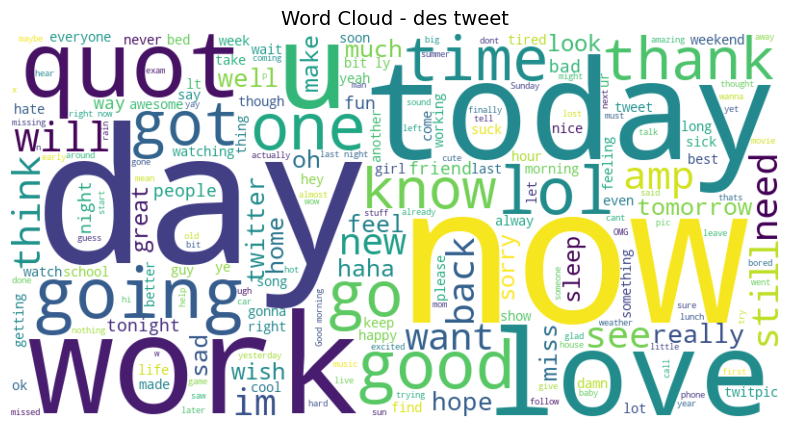

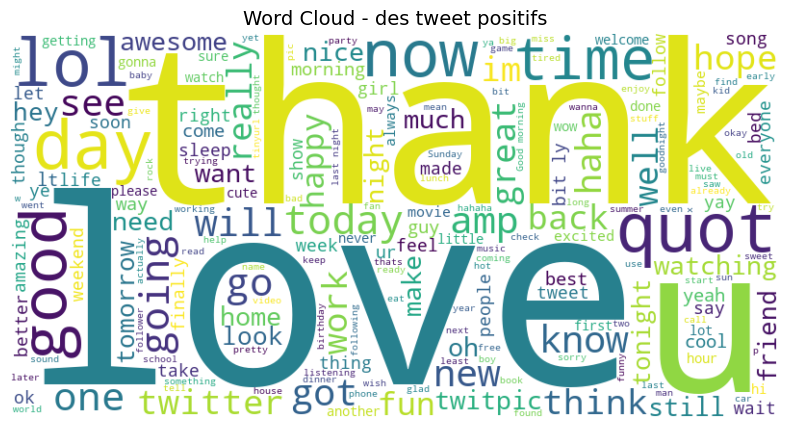

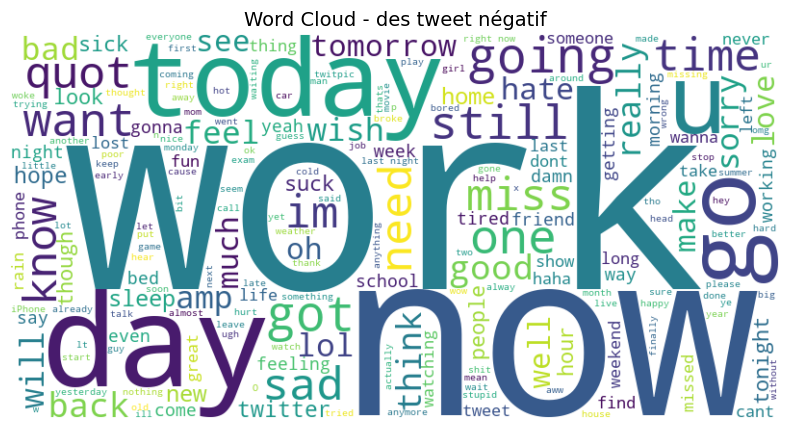

In [10]:

# Fonction pour générer le word cloud
def generer_wordcloud(tweets, titre):
    tout_texte = ' '.join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df_select['text'], 'Word Cloud - des tweet')
generer_wordcloud(tweets_positifs['text'], 'Word Cloud - des tweet positifs')
generer_wordcloud(tweets_negatifs['text'], 'Word Cloud - des tweet négatif')

# Prétraitement des tweets

- **1) Tokenisation:**
 La tokenisation consiste à diviser un texte en unités linguistiques plus petites appelées "tokens". Un token peut être un mot individuel, une ponctuation ou même une partie d'un mot, selon la façon dont le texte est analysé. La tokenisation est souvent réalisée en utilisant des techniques telles que la séparation par des espaces, la reconnaissance de motifs (regex) ou l'utilisation de modèles de langage.

Par exemple, pour la phrase "Le chat est sur le tapis.", la tokenisation peut produire les tokens suivants : ["Le", "chat", "est", "sur", "le", "tapis", "."]. Chaque mot et signe de ponctuation est extrait comme un token distinct.

- **2)** Dans un second temps, On va nettoyer le text des caractères spéciaux et des mots inotils 

In [20]:
#pip install nltk
#re est un module intégré qui permet de travailler avec des expressions régulières (regex), ca permet de Rechercher des motifs, Remplacer de texte,Extraire des données ....

#nltk (Natural Language Toolkit) est une bibliothèque externe dédiée au traitement du langage naturel (NLP), elle permet la Tokenisation, le Traitement linguistique, Corpus linguistiques ....

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


def clean_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Tokenisation du texte
    tokens = word_tokenize(text)
    # Suppression des mots vides
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Joindre les tokens en une seule chaîne
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


# Appliquer le nettoyage du texte sur la colonne 'texte'
df_select['texte_nettoye'] = df_select['text'].apply(clean_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khodj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khodj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khodj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\khodj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


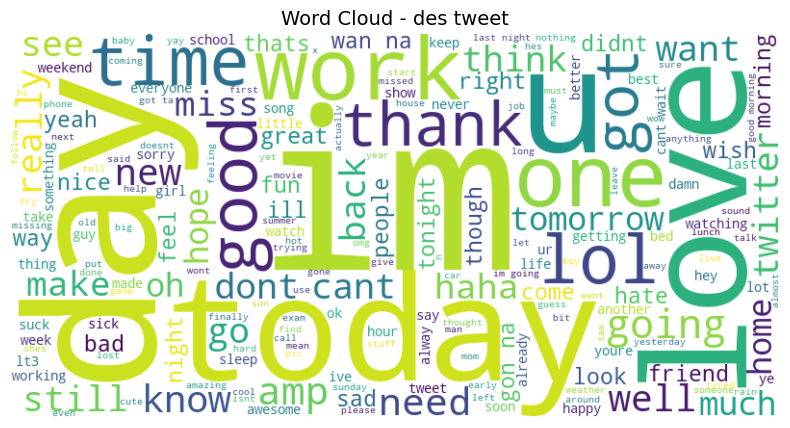

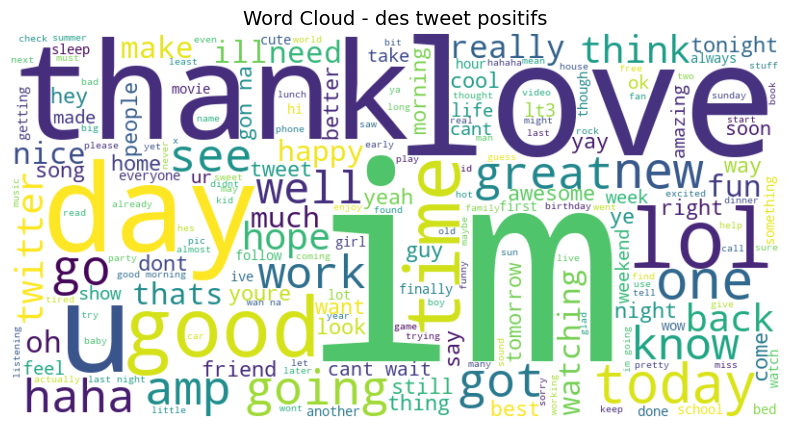

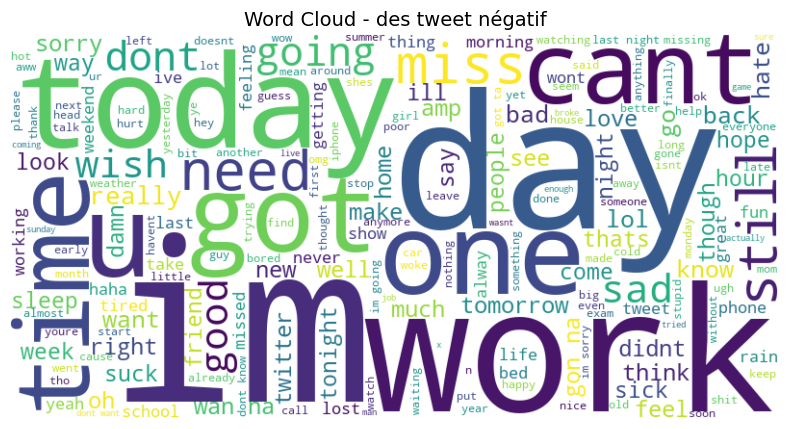

In [12]:
# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df_select['texte_nettoye'], 'Word Cloud - des tweet')
# Filtrer les tweets positifs
tweets_positifs = df_select[df_select['target'] == 1]['texte_nettoye']
generer_wordcloud(tweets_positifs, 'Word Cloud - des tweet positifs')
# Filtrer les tweets positifs
tweets_negatifs = df_select[df_select['target'] == 0]['texte_nettoye']
generer_wordcloud(tweets_negatifs, 'Word Cloud - des tweet négatif')

# Convertir le texte en numérique

##### TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF est une technique utilisée en traitement automatique du langage naturel (NLP) pour évaluer l'importance d'un terme dans un document par rapport à une collection de documents. Elle combine la fréquence du terme (TF) et l'inverse de la fréquence dans les documents (IDF).

TF mesure le nombre de fois qu'un terme apparaît dans un document, tandis que IDF évalue l'importance d'un terme dans la collection globale de documents en réduisant le poids des termes fréquents.

**En utilisant TF-IDF, on peut attribuer une valeur numérique à chaque terme, reflétant à la fois sa fréquence dans le document et son importance relative dans la collection de documents**.



Supposons que nous ayons trois documents :

Document 1 : "Le chat est mignon."

Document 2 : "Le chien est fidèle."

Document 3 : "Le chien et le chat jouent ensemble."

Calculons maintenant le score TF-IDF pour les termes "chat" et "chien" dans chaque document :

**Fréquence des termes (TF)**

TF("chat", Document 1) = 1

TF("chien", Document 1) = 0

TF("chat", Document 2) = 0

TF("chien", Document 2) = 1

TF("chat", Document 3) = 1

TF("chien", Document 3) = 1


**Fréquence inverse dans les documents (IDF)**

IDF("chat") = log(3/2) = log(1.5) ≈ 0.18

IDF("chien") = log(3/2) = log(1.5) ≈ 0.18

**TF-IDF**

TF-IDF("chat", Document 1) = 1 * 0.18 ≈ 0.18

TF-IDF("chien", Document 1) = 0 * 0.18 = 0

TF-IDF("chat", Document 2) = 0 * 0.18 = 0

TF-IDF("chien", Document 2) = 1 * 0.18 ≈ 0.18

TF-IDF("chat", Document 3) = 1 * 0.18 ≈ 0.18

TF-IDF("chien", Document 3) = 1 * 0.18 ≈ 0.18


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer une instance du vectoriseur TfidfVectorizer
vectorizer = TfidfVectorizer()

# Appliquer le vectoriseur sur la colonne 'texte_nettoye'
features = vectorizer.fit_transform(df_select['texte_nettoye'])

# Convertir les caractéristiques en une représentation de matrice creuse
features = features.toarray()

# Afficher les dimensions de la matrice de caractéristiques
print("Dimensions de la matrice de caractéristiques :", features.shape)

Dimensions de la matrice de caractéristiques : (20000, 33317)


In [17]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Tant qu'on a la matrice creuse, on peut entrainer un modele de regression logistique**

# Modélisation

In [21]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test de façon stratifiée
X_train, X_test, y_train, y_test = train_test_split(features, df_select['target'], test_size=0.2, stratify=df_select['target'], random_state=42)


In [22]:
# Construire le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les probabilités pour les ensembles d'entraînement et de test
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]


In [23]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Calculer les valeurs de la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

# Calculer l'AUC pour les ensembles d'entraînement et de test
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)


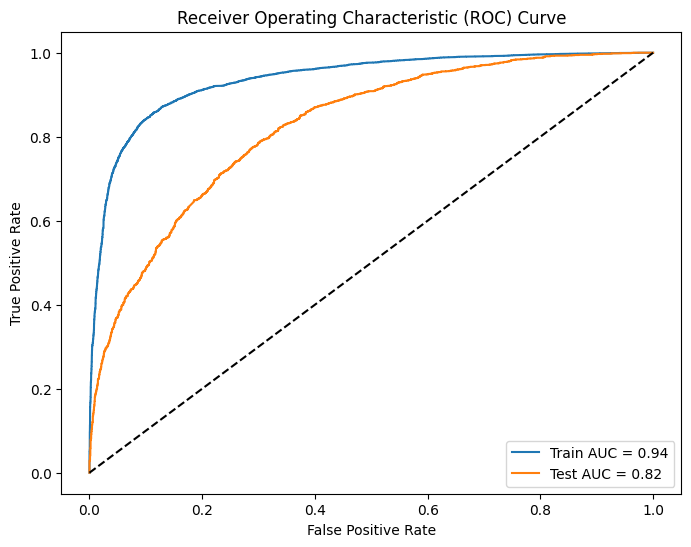

In [24]:
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [25]:

# Calculer les performances sur les ensembles d'entraînement et de test
train_accuracy = accuracy_score(y_train, model.predict(X_train))
train_precision = precision_score(y_train, model.predict(X_train))
train_recall = recall_score(y_train, model.predict(X_train))
train_f1 = f1_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
test_precision = precision_score(y_test, model.predict(X_test))
test_recall = recall_score(y_test, model.predict(X_test))
test_f1 = f1_score(y_test, model.predict(X_test))

# Créer un tableau des performances
performance_table = pd.DataFrame({
    'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

print(performance_table)


  Performance     Train      Test
0    Accuracy  0.868750  0.742250
1   Precision  0.862764  0.728862
2      Recall  0.877000  0.771500
3    F1 Score  0.869824  0.749575
